### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import uniform
from scipy.stats import norm
import re

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [4]:
data = pd.read_csv('/Users/jubacochran/environments/module_5/coupons.csv')

In [5]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


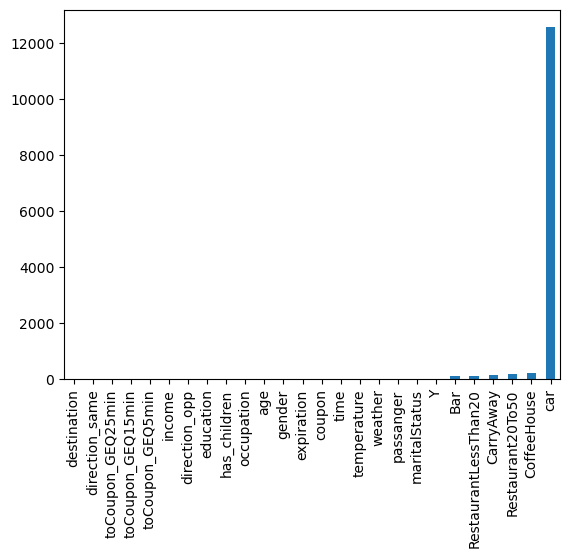

In [6]:
data.isnull().sum().sort_values().plot(kind='bar')
data.loc[data['car'].isnull()]

3. Decide what to do about your missing data -- drop, replace, other...

In [7]:


#Filling in the values that were missing with "unknown" This is so I can plot and analize data better. I didn't wan to drop nulls

data['CarryAway'].fillna('Unknown', inplace=True)
data['car'].fillna('Unknown', inplace=True)
data['Bar'].fillna('Unknown', inplace=True)
data['CoffeeHouse'].fillna('Unknown', inplace=True)
data['RestaurantLessThan20'].fillna('Unknown', inplace=True)
data['Restaurant20To50'].fillna('Unknown', inplace=True)


4. What proportion of the total observations chose to accept the coupon? 



In [8]:
#Selecting the population that chose to accept the coupon. This was denoted by a 1 in the notes. 
yes_no_counts = data.query("Y == 1").shape[0]

# Calculate the percentage
yes_no_percentage = (yes_no_counts / data['Y'].shape[0]) * 100

print(f"{yes_no_percentage:.2f}%, of the population chose to accept the coupon.")

56.84%, of the population chose to accept the coupon.


5. Use a bar plot to visualize the `coupon` column.

Y                              0          1
coupon                                     
Bar                    58.998513  41.001487
Carry out & Take away  26.452152  73.547848
Coffee House           50.075075  49.924925
Restaurant(20-50)      55.898123  44.101877
Restaurant(<20)        29.289304  70.710696


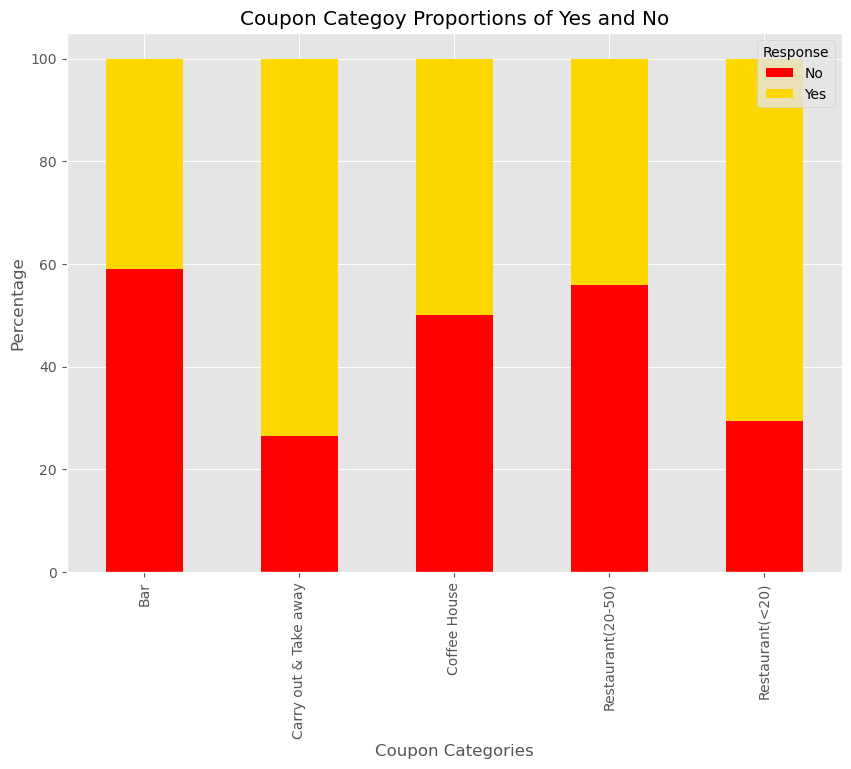

In [9]:
#using groupby method to create sub's of coupon and to returen proportions in percentages

catagoryies_of_coupons = data.groupby('coupon')['Y'].value_counts(normalize=True).unstack() * 100
print(catagoryies_of_coupons)

#Using a style for polish
plt.style.use('ggplot')
catagoryies_of_coupons.plot(kind='bar', stacked=True, color=['Red', 'Gold'], figsize=(10, 7))

plt.title('Coupon Categoy Proportions of Yes and No')
plt.xlabel('Coupon Categories')
plt.ylabel('Percentage')
plt.legend(title='Response', labels=['No', 'Yes'])

plt.show()

6. Use a histogram to visualize the temperature column.

temperature
False    12684
Name: count, dtype: int64
count    12684.000000
mean        63.301798
std         19.154486
min         30.000000
25%         55.000000
50%         80.000000
75%         80.000000
max         80.000000
Name: temperature, dtype: float64


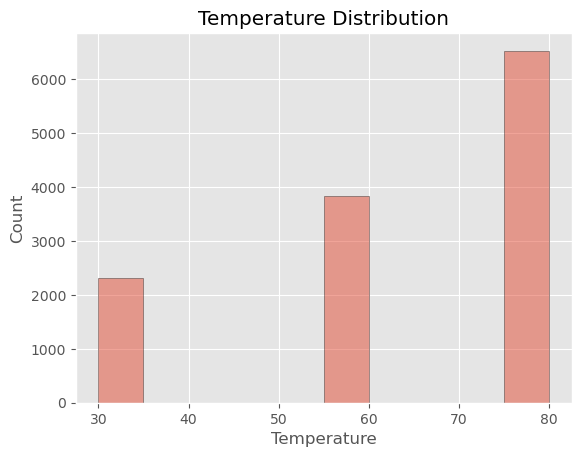

In [10]:
#This plot shows a skewed ditribution. I tried some transformation to make this distribution normal but they all showed similar distribtions
plt.hist(data['temperature'], edgecolor='black', alpha=0.5)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.grid(True)
#plt.show()

#Furthermore I'm not missing any data in the temperature column
print(data['temperature'].isnull().value_counts())
print(data['temperature'].describe())

In [11]:
#This data has holes in it that I'll need to fill with theoretiacal PDF. I tried a few transormations but it didn't work

#Creating a PD for temp
temp= uniform(loc=30, scale = 50)
#a, b = data['temperature'].min(), data['temperature'].max()
#print(a,b)

Mean: 55.0, Variance: 208.33333333333331


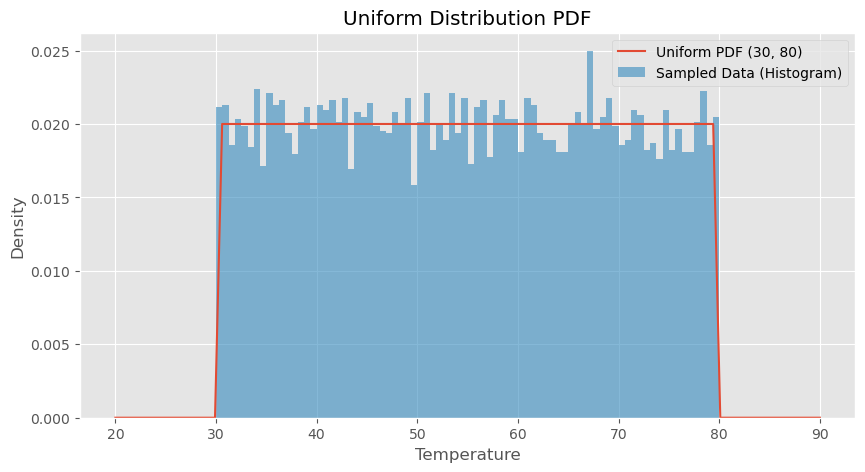

In [42]:
#Using this method from class to create spaced values and to compare plots
x = np.linspace(20,90,100)
y = temp.pdf(x)

temp_mean = temp.mean()
temp_variance = temp.var()
print(f"Mean: {temp_mean}, Variance: {temp_variance}")

plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Uniform PDF (30, 80)')
plt.title('Uniform Distribution PDF')
plt.xlabel('Temperature')
plt.ylabel('Density')
plt.grid(True)
plt.legend()

# Sample from the distribution and plot the histogram
samples = temp.rvs(size=10000)  # Law of large numbers at play
plt.hist(samples, bins=80, alpha=0.6, label='Sampled Data (Histogram)', density=True)
plt.legend()
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [43]:
#Creating new DataFrame focusing on Bar coupon and resetting index
bar_coupons = data[data['coupon']=='Bar'].reset_index()
print(bar_coupons)
print(type(bar_coupons))

      index      destination  passanger weather  temperature  time coupon  \
0         9  No Urgent Place     Kid(s)   Sunny           80  10AM    Bar   
1        13             Home      Alone   Sunny           55   6PM    Bar   
2        17             Work      Alone   Sunny           55   7AM    Bar   
3        24  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar   
4        35             Home      Alone   Sunny           55   6PM    Bar   
...     ...              ...        ...     ...          ...   ...    ...   
2012  12663  No Urgent Place  Friend(s)   Sunny           80  10PM    Bar   
2013  12664  No Urgent Place  Friend(s)   Sunny           55  10PM    Bar   
2014  12667  No Urgent Place      Alone   Rainy           55  10AM    Bar   
2015  12670  No Urgent Place    Partner   Rainy           55   6PM    Bar   
2016  12682             Work      Alone   Snowy           30   7AM    Bar   

     expiration  gender age  ... RestaurantLessThan20  Restaurant20To50  \


2. What proportion of bar coupons were accepted?


In [44]:
#Return a Series containing counts of unique values
bar_yes_no_counts = bar_coupons.query("Y == 1").shape[0]

# Calculate the percentage
bar_yes_no_percentage = (bar_yes_no_counts / data['Y'].shape[0]) * 100

print(f"Percentage across the Populaiton of coupon acceptance: \n{bar_yes_no_percentage:.3f}")

Percentage across the Populaiton of coupon acceptance: 
6.520


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [45]:
#I'm calculating these as acceptance = (criteria/total number of Bar outcomes) I'm assuming you want this in context of bar and not the population of the dataset of vector 'Y'
#Creating conditional statement query for frequency of 3 or fewer times
went_to_bar_3_or_less = bar_coupons.query("Bar == '1~3' or Bar == 'less1' ")

#Creating conditional statement query for frequency of 4 or more times
went_to_bar_4_or_more = bar_coupons.query("Bar == '4~8' or Bar == 'gt8' ")

# Calculate the acceptance rate for those who went to a bar 3 or fewer times
yes_count_3_or_less = went_to_bar_3_or_less.query("Y == 1").shape[0]
total_responses_3_or_less = bar_coupons['Y'].count()
#Calculating acceptance rate
acceptance_rate_3_or_less = yes_count_3_or_less / total_responses_3_or_less *100

# Calculate the acceptance rate for those who went to a bar 4 or more times
yes_count_4_or_more = went_to_bar_4_or_more.query("Y == 1").shape[0]
total_responses_4_or_more = bar_coupons['Y'].count()
#Calculating acceptance rate
acceptance_rate_4_or_more = yes_count_4_or_more / total_responses_4_or_more *100

# Print the results for comparison
print(f"Acceptance Rate for 3 or fewer times to the Bar: {acceptance_rate_3_or_less:.2f}")
print(f"Acceptance Rate for 4 or more times to the Bar: {acceptance_rate_4_or_more:.2f}")

Acceptance Rate for 3 or fewer times to the Bar: 25.29
Acceptance Rate for 4 or more times to the Bar: 7.59


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [46]:
#Filtering Bar Coupons and assigning to new DF(just playing with different ways of doing this)
drivers_bar =data[data['coupon'] == 'Bar']

#Filtering for drivers over the age of 25 who accepted the coupon that visit the bar more than once a month. 
age_bar_over25_years_old = drivers_bar.query("age in ['26', '31', '50plus', '41', '36', '46'] and Bar in ['1~3', '4~8', 'gt8']")
accepted_over_25 = age_bar_over25_years_old.query("Y == 1")

num_accepted_age = accepted_over_25.shape[0]
print(num_accepted_age)

'''
Attemping to filter for all other drivers(I'm not 100% sure if it should include or exclue every value in the Bar vector. The question implies "all others")
I'm not sure if it's reasonable to teat null values as I've defined 'never'. It heavliy skews my data. If I include 'never' my values are as calculated below:
Acceptance Rate for drivers over 25 who go to the bar frequently and accepted the coupon: 0.12
Acceptance Rate for all other bar visitors: 0.17
'''

all_others = drivers_bar.query("not (age in ['26', '31', '50plus', '41', '36', '46'] and Bar in ['less1','1~3', '4~8', 'gt8'])")
all_other_accepted = all_others.query("Y == 1 ").shape[0]
#print(all_others)

#Defining the denom for rate calc
total_responses = drivers_bar.shape[0]

# Calculating the acceptance rates acceptance = number of yes according to age and frequencey/total responses across all others
#total_yes_over25 = age_bar_over25_years_old['Y'].sum()
total_responses_over25 = num_accepted_age
acceptance_rate_over25 = (total_responses_over25 / total_responses) * 100

#total_yes_others = all_others['Y'].sum()
total_responses_others = all_other_accepted
acceptance_rate_others = (all_other_accepted / total_responses) *100



# Print the results: I didn't format the the int to, two decimal places because I wanted to see the raw value since I'm confused about 'never' situation in Bar
print(f"Acceptance Rate for drivers over 25 who go to the bar frequently and accepted the coupon: {acceptance_rate_over25}")
print(f"Acceptance Rate for all other bar visitors: {acceptance_rate_others}")

292
Acceptance Rate for drivers over 25 who go to the bar frequently and accepted the coupon: 14.476945959345564
Acceptance Rate for all other bar visitors: 17.45166088249876


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [47]:
#Filtering Bar Coupons and assigning to new DF(just playing with different ways of doing this)

# Filter the DataFrame based on sets of criteria in the question
drivers_with_passengers_and_occupations_bar = data.query(
    "coupon == 'Bar' and passanger != 'Kid(s)' and ~occupation.isin(['farming', 'fishing', 'forestry'])"
).reset_index()

#Calculating the number of 'Yes' responses within the filtered group
accepted_drivers_with_passengers = drivers_with_passengers_and_occupations_bar.query("Y == 1")

num_accepted = accepted_drivers_with_passengers.shape[0]

#Calculating the total number of responses in the filtered group
total_responses = drivers_bar.shape[0]  # Total opportunities for acceptance

#Calculating the acceptance rate
acceptance_rate = num_accepted / total_responses *100

# Printing the results

print(f"Acceptance Rate: {acceptance_rate:.2f}")

Acceptance Rate: 38.87


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [48]:
set_1_kids_not_widowed = data.query("coupon == 'Bar' and Bar in ['1~3', '4~8', 'gt8'] and passanger != 'Kid(s)' and maritalStatus != 'Widowed' ")

set_2_under_age_30 = data.query("coupon == 'Bar' and Bar in ['1~3', '4~8', 'gt8'] and age <= '30' ")

def calculate_acceptance_rate(df):
    total_responses = df.shape[0]
    accepted_responses = df['Y'].sum()
    return accepted_responses / total_responses

def check_income_range(income_str):
    # Check if '50000' is part of the string
    pattern = r'\b50000\b'
    return bool(re.search(pattern, str(income_str)))

# Apply this function to the 'income' column to create a new boolean column
data['income_match'] = data['income'].apply(check_income_range)

set_3_cheap_restaurants_4_times_income50K = data.query(
    "coupon == 'Restaurant(<20)' and RestaurantLessThan20 == '4~8' and income_match"
)
#Looking at my dataset
#print(set_3_cheap_restaurants_4_times_income50K.reset_index())

acceptance_rate_set_1 = calculate_acceptance_rate(set_1_kids_not_widowed)
acceptance_rate_set_2 = calculate_acceptance_rate(set_2_under_age_30)


accepted_coupons_set_3 = set_3_cheap_restaurants_4_times_income50K[set_3_cheap_restaurants_4_times_income50K['Y'] == 1]
acceptance_rate_set_3 = len(accepted_coupons_set_3) / len(set_3_cheap_restaurants_4_times_income50K) if len(set_3_cheap_restaurants_4_times_income50K) > 0 else 0 #attempting to handle zeros here

# Print the acceptance rate
print(f"Acceptance Rate for Set 1 (No kids and not Widowed): {acceptance_rate_set_1:.2f}")
print(f"Acceptance Rate for Set 2 (Under Age 30): {acceptance_rate_set_2:.2f}")
print(f"Acceptance Rate for Set 3 (Cheap Restaurants, 4 times a month, Income ~$50K): {acceptance_rate_set_3:.2f}")

# how many rows have '50000' in the 'income' column.
print(data['income_match'].sum())



Acceptance Rate for Set 1 (No kids and not Widowed): 0.71
Acceptance Rate for Set 2 (Under Age 30): 0.73
Acceptance Rate for Set 3 (Cheap Restaurants, 4 times a month, Income ~$50K): 0.84
1659


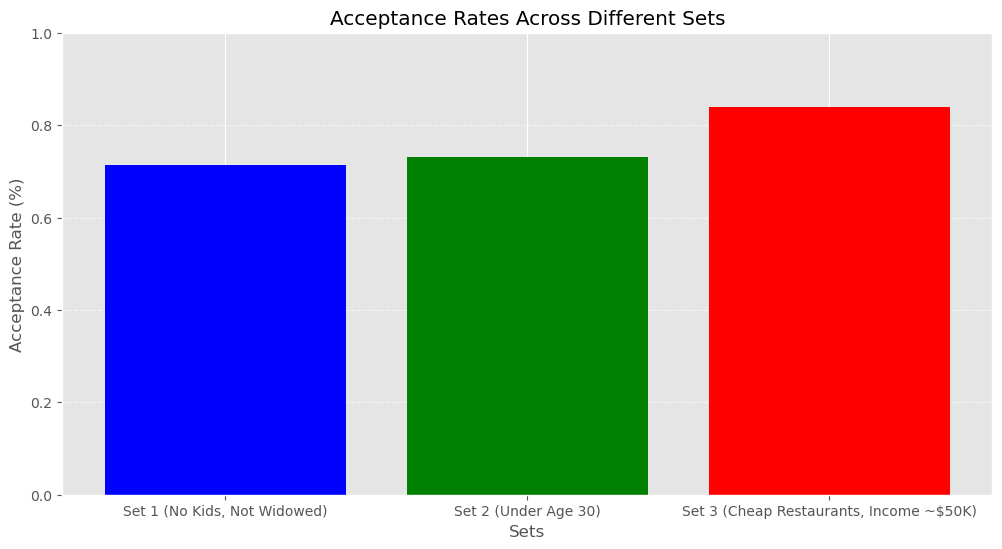

In [49]:


# Labels and corresponding acceptance rates
labels = [
    'Set 1 (No Kids, Not Widowed)',
    'Set 2 (Under Age 30)',
    'Set 3 (Cheap Restaurants, Income ~$50K)'
]
rates = [acceptance_rate_set_1, acceptance_rate_set_2, acceptance_rate_set_3]

# Creating the bar plot
plt.figure(figsize=(12, 6))
plt.bar(labels, rates, color=['blue', 'green', 'red'])
plt.ylabel('Acceptance Rate (%)')
plt.xlabel('Sets')
plt.ylim(0, 1)
plt.title('Acceptance Rates Across Different Sets')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Display the plot
plt.show()


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [50]:
'''
In general people were likely to accept the coupons when taking the entire population into consideration. Statistics for the Yes vs No of the entire population:
Population proportion of coupon acceptance:
Stats:

Y
0    58.998513
1    41.001487
Based on what I've calculated from the dataset it appears younger drivers who were not widowed were more likely to accept bar coupons and especially trended going to cheaper restaruants.(we can observe this in the "Acceptance Rate for Set 1-3 as mentioned previously")
Stats:

Acceptance Rate for Set 1 (No kids and not Widowed): 0.71
Acceptance Rate for Set 2 (Under Age 30): 0.73
Acceptance Rate for Set 3 (Cheap Restaurants, 4 times a month, Income ~$50K): 0.84

As a matter of fact younger drivers accepted the bar coupons more than older age groups:
Acceptance Rate for drivers over 25 who go to the bar frequently and accepted the coupon: 14.5%
Acceptance Rate for all other bar visitors: 17%


Drivers who went to the bar less ofen are more likely to accept the coupons: (found this surprsing here. I thought those who went to the bar more often accepted the coupon)
Stats:

Acceptance Rate for 3 or fewer times to the Bar: 0.25
Acceptance Rate for 4 or more times to the Bar: 0.08

'''

'\nIn general people were less likely to accept the coupons when taking the entire population into consideration. Statistics for the Yes vs No of the entire population:\nPopulation proportion of coupon acceptance:\nStats:\n\nY\n0    58.998513\n1    41.001487\nBased on what I\'ve calculated from the dataset it appears younger drivers who were not widowed were more likely to accept bar coupons and especially trended going to cheaper restaruants.(we can observe this in the "Acceptance Rate for Set 1-3 as mentioned previously")\nStats:\n\nAcceptance Rate for Set 1 (No kids and not Widowed): 0.71\nAcceptance Rate for Set 2 (Under Age 30): 0.73\nAcceptance Rate for Set 3 (Cheap Restaurants, 4 times a month, Income ~$50K): 0.84\n\nAs a matter of fact younger drivers accepted the bar coupons more than older age groups:\nAcceptance Rate for drivers over 25 who go to the bar frequently and accepted the coupon: 14.5%\nAcceptance Rate for all other bar visitors: 17%\n\n\nDrivers who went to the ba

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


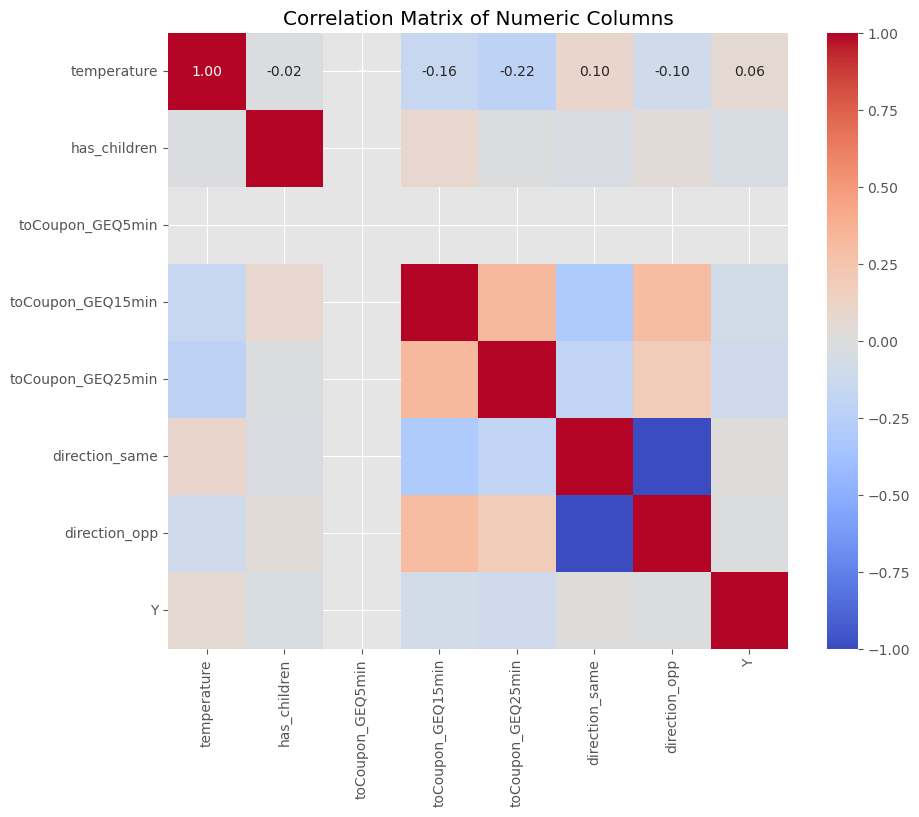

In [51]:
# I wanted to see if there was a correlation between any of the raw int data so I created a correlation matrix and a heatmap to visualize. Over all these variables seem to have low correlation with each other and in other cases a negative correlation. Like in the instance of, 
#temperature to any of the distance variables and including the drivers decision to go to the bar. 

int_columns = ['temperature', 'has_children', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 
                   'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y']

# Calculate the correlation matrix
correlation_matrix = data[int_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()



### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [52]:
#What percentage of drivers accepted the coffee house coupon?

#Creating coffee house dataframe
coffee_house_coupons = data[data['coupon']=='Coffee House']
#Filtering the "Y" column for yes responses and getting the matrix shape
coffee_house_criteria = coffee_house_coupons.query("Y == 1").shape[0]

# Calculate the percentage acceptance = criteria/total numb of outcomes
coffee_house_percentage = (coffee_house_criteria/data['Y'].shape[0]) * 100


print(f"Percentage of drivers that accepted the Coffe House coupon: \n{coffee_house_percentage:.3f}")

Percentage of drivers that accepted the Coffe House coupon: 
15.728


In [53]:
#What was the acceptance rate of those who went to the coffee house 1 or less time to others that went more.



went_to_CH_3_or_less = coffee_house_coupons.query("CoffeeHouse == '1~3' or CoffeeHouse == 'less1' ")

#Creating conditional statement query for frequency of 4 or more times
went_to_CH_4_or_more = coffee_house_coupons.query("CoffeeHouse == '4~8' or CoffeeHouse == 'gt8' ")

# Calculate the acceptance rate for those who went to a bar 3 or fewer times
ch_yes_count_3_or_less = went_to_CH_3_or_less.query("Y == 1").shape[0]
ch_total_responses_3_or_less = coffee_house_coupons['Y'].count()
#Calculating acceptance rate
ch_acceptance_rate_3_or_less = ch_yes_count_3_or_less / ch_total_responses_3_or_less *100

# Calculate the acceptance rate for those who went to a bar 4 or more times
ch_yes_count_4_or_more = went_to_CH_4_or_more.query("Y == 1").shape[0]
ch_total_responses_4_or_more = coffee_house_coupons['Y'].count()
#Calculating acceptance rate
ch_acceptance_rate_4_or_more = ch_yes_count_4_or_more / ch_total_responses_4_or_more *100

# Print the results for comparison
print(f"Acceptance Rate for 3 or fewer times to the Coffee House: {ch_acceptance_rate_3_or_less:.2f}")
print(f"Acceptance Rate for 4 or more times to the Coffee House: {ch_acceptance_rate_4_or_more:.2f}")

Acceptance Rate for 3 or fewer times to the Coffee House: 29.85
Acceptance Rate for 4 or more times to the Coffee House: 14.86


In [54]:
set_1_kids_married = data.query("coupon == 'Coffee House' and CoffeeHouse in ['1~3', '4~8', 'gt8'] and passanger == 'Kid(s)' and maritalStatus == 'Married partner'")

set_2_age_41 = data.query("coupon == 'Coffee House' and CoffeeHouse in ['1~3', '4~8', 'gt8'] and age >= '41' ")

#I could have reused the functions from earlier but honestly I'm exhasted
def ch_calculate_acceptance_rate(df):
    '''
    Calculates the acceptance rate from a pandasdataframe from pasing in a series of intergers. 
    '''
    ch_total_responses = df.shape[0]
    ch_accepted_responses = df['Y'].sum()
    return ch_accepted_responses / ch_total_responses

def ch_check_income_range(income_str):
    # Check if '100000' is part of the string
    patterns = r'\b100000\b'
    return bool(re.search(patterns, str(income_str)))

# Apply this function to the 'income' column to create a new boolean column
data['income_match_coffee_house'] = data['income'].apply(ch_check_income_range)

set_3_expensive_restaraunts = data.query(
    "coupon == 'Restaurant(<20)' and income_match_coffee_house"
)
#Looking at my dataset to see salary ranges testing
print(set_3_expensive_restaraunts.iloc[3: ,10:].reset_index())

ch_acceptance_rate_set_1 = ch_calculate_acceptance_rate(set_1_kids_married)
ch_acceptance_rate_set_2 = ch_calculate_acceptance_rate(set_2_under_age_30)


ch_accepted_coupons_set_3 = set_3_expensive_restaraunts[set_3_expensive_restaraunts['Y'] == 1]
ch_acceptance_rate_set_3 = len(ch_accepted_coupons_set_3) / len(set_3_expensive_restaraunts) if len(set_3_expensive_restaraunts) > 0 else 0 #attempting to handle zeros here

# Print the acceptance rate
print(f"Acceptance Rate for Set 1 (kids and married): {ch_acceptance_rate_set_1:.2f}")
print(f"Acceptance Rate for Set 2 (Age 41 or older): {ch_acceptance_rate_set_2:.2f}")
print(f"Acceptance Rate for Set 3 (Expensive Restaurants, Income ~$100,000K): {ch_acceptance_rate_set_3:.2f}")


     index  has_children                               education  \
0      213             0                Some college - no degree   
1      343             1  Graduate degree (Masters or Doctorate)   
2      348             1  Graduate degree (Masters or Doctorate)   
3      350             1  Graduate degree (Masters or Doctorate)   
4      353             1  Graduate degree (Masters or Doctorate)   
..     ...           ...                                     ...   
371  12423             1                Some college - no degree   
372  12642             1                        Bachelors degree   
373  12646             1                        Bachelors degree   
374  12648             1                        Bachelors degree   
375  12649             1                        Bachelors degree   

                  occupation           income      car    Bar CoffeeHouse  \
0            Sales & Related  $100000 or More  Unknown  less1       never   
1    Computer & Mathematical 

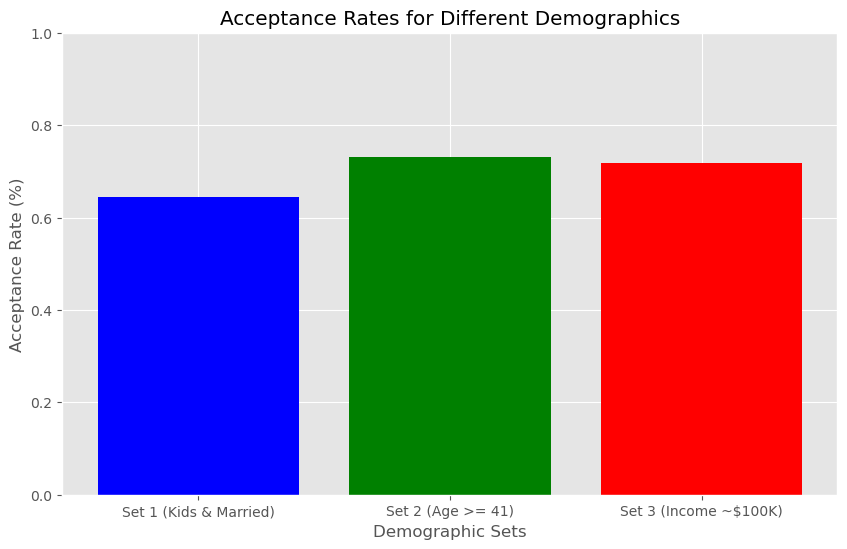

In [55]:



# Labels for the Coffee House
labels = ['Set 1 (Kids & Married)', 'Set 2 (Age >= 41)', 'Set 3 (Income ~$100K)']

# Heights of the bars, corresponding to acceptance rates
heights = [ch_acceptance_rate_set_1, ch_acceptance_rate_set_2, ch_acceptance_rate_set_3]

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(labels, heights, color=['blue', 'green', 'red'])
plt.title('Acceptance Rates for Different Demographics')
plt.xlabel('Demographic Sets')
plt.ylabel('Acceptance Rate (%)')
plt.ylim(0, 1)  # Assuming the rates are in decimal form (0.25 means 25%)

# Show the plot
plt.show()


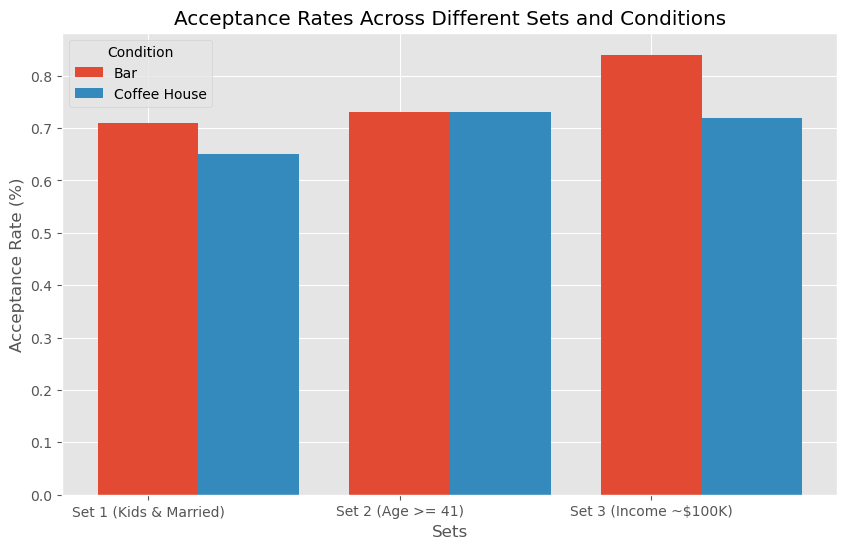

In [56]:
#I asked chatgpt to show me how to develp this code in order to juxtopose the data and categorize it into one single plot.

acceptance_rates = {'Bar': [0.71,0.73, 0.84],
                    'Coffee House': [0.65,0.73,0.72]

}
conditions = ['Bar', 'Coffee House']
# Number of sets
n_sets = len(labels)

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set positions of the bars
total_width = 0.8
individual_width = total_width / len(conditions)
indices = np.arange(n_sets)

# Plot bars for each condition
for i, condition in enumerate(conditions):
    rates = acceptance_rates[condition]
    ax.bar(indices + i * individual_width, rates, individual_width, label=condition)

# Labeling
ax.set_xlabel('Sets')
ax.set_ylabel('Acceptance Rate (%)')
ax.set_title('Acceptance Rates Across Different Sets and Conditions')
ax.set_xticks(indices + total_width / len(conditions) / 2 - individual_width / 2)
ax.set_xticklabels(labels)
ax.legend(title='Condition')

# Show plot
plt.show()